For that lab we will need keras

In [1]:
!python -m pip install keras

  Using cached keras-2.7.0-py2.py3-none-any.whl (1.3 MB)
You should consider upgrading via the '/home/sergei/Desktop/projects/ImgP/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install tensorflow

  Using cached tensorflow-2.7.0-cp37-cp37m-manylinux2010_x86_64.whl (489.6 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached wrapt-1.13.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (79 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached protobuf-3.19.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Using cached tensorboard-2.7.0-py3-none-any.whl (5.8 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorflow_estimator-2.7.0-py2.py3-none-any.whl (463 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
     |████████████████████████████████| 2.1 MB 888 kB/s eta 0:00:01
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached libclang-12.0.0-py2.py3-none-manylinux1_x86_64.whl (13.4 MB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached

Let's create the [VGG16](https://keras.io/api/applications/vgg/) default model with pretrained weights on [ImageNet](http://www.image-net.org/) dataset

In [1]:
import keras
import tensorflow as tf

model = tf.keras.applications.vgg16.VGG16()

2021-12-17 11:09:49.903374: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-17 11:09:49.925741: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-17 11:09:49.926021: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-17 11:09:49.926864: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

### Getting weight and layers data 

First, we will visualize this model

In [2]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes= True, show_layer_names=True, dpi=65).create(prog='dot', format='svg'))

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


AttributeError: 'NoneType' object has no attribute 'create'

And also see the shapes of weights

In [ ]:
weights = model.get_weights()
for weight in weights:
    print(weight.shape)

(3, 3, 3, 64)
(64,)
(3, 3, 64, 64)
(64,)
(3, 3, 64, 128)
(128,)
(3, 3, 128, 128)
(128,)
(3, 3, 128, 256)
(256,)
(3, 3, 256, 256)
(256,)
(3, 3, 256, 256)
(256,)
(3, 3, 256, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(25088, 4096)
(4096,)
(4096, 4096)
(4096,)
(4096, 1000)
(1000,)


We can also access each layer separately

In [ ]:
layers = model.layers
for layer in layers:
    print(layer)

You might notice that the number of weights is greater than the number of layers. This is because we also have bias weights, in which we are not currently inerested in.

### Task 1 
Visualize weights from the firts layer of the pretrained network which connects input with the next layer

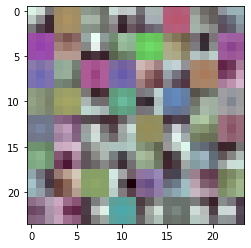

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# your code to get filter from weights and than transform to the shape, that is compatible with cv2
# please notice the shape of the layer
l1_weights = np.array(model.layers[1].get_weights()[0])
img = np.zeros((8*3, 8*3, 3))

for row in range(8):
  for col in range(8):
    img[row*3:row*3+3, col*3:col*3+3, 0:3] = l1_weights[:, :, :, 8*row + col]

cv2.normalize(img,  img, 0, 255, cv2.NORM_MINMAX)
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.imshow(img.astype('uint8'))

### Task 2a

Feed an image to the model and get an output image from some layer

You can see the output from each layer using this [guide](https://stackoverflow.com/a/41712013)

In [ ]:
from keras import backend as K
import cv2
import matplotlib.pyplot as plt

inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functors = [K.function([inp], [out]) for out in outputs]    # evaluation functions

img = cv2.imread('igor.jpg')
img = cv2.resize(img, (224, 224))
img = tf.keras.applications.vgg16.preprocess_input(img)
img = img.reshape((1, 224, 224, 3))
layer_outs = [func([img]) for func in functors]

In [ ]:
l3_output = np.array(layer_outs[3])
l3_output = l3_output.reshape((112, 112, 64))

img_l3 = np.zeros((112*8, 112*8))

for row in range(8):
  for col in range(8):
    img_l3[row*112:row*112+112, col*112:col*112+112] = l3_output[:, :, 8*row+col]

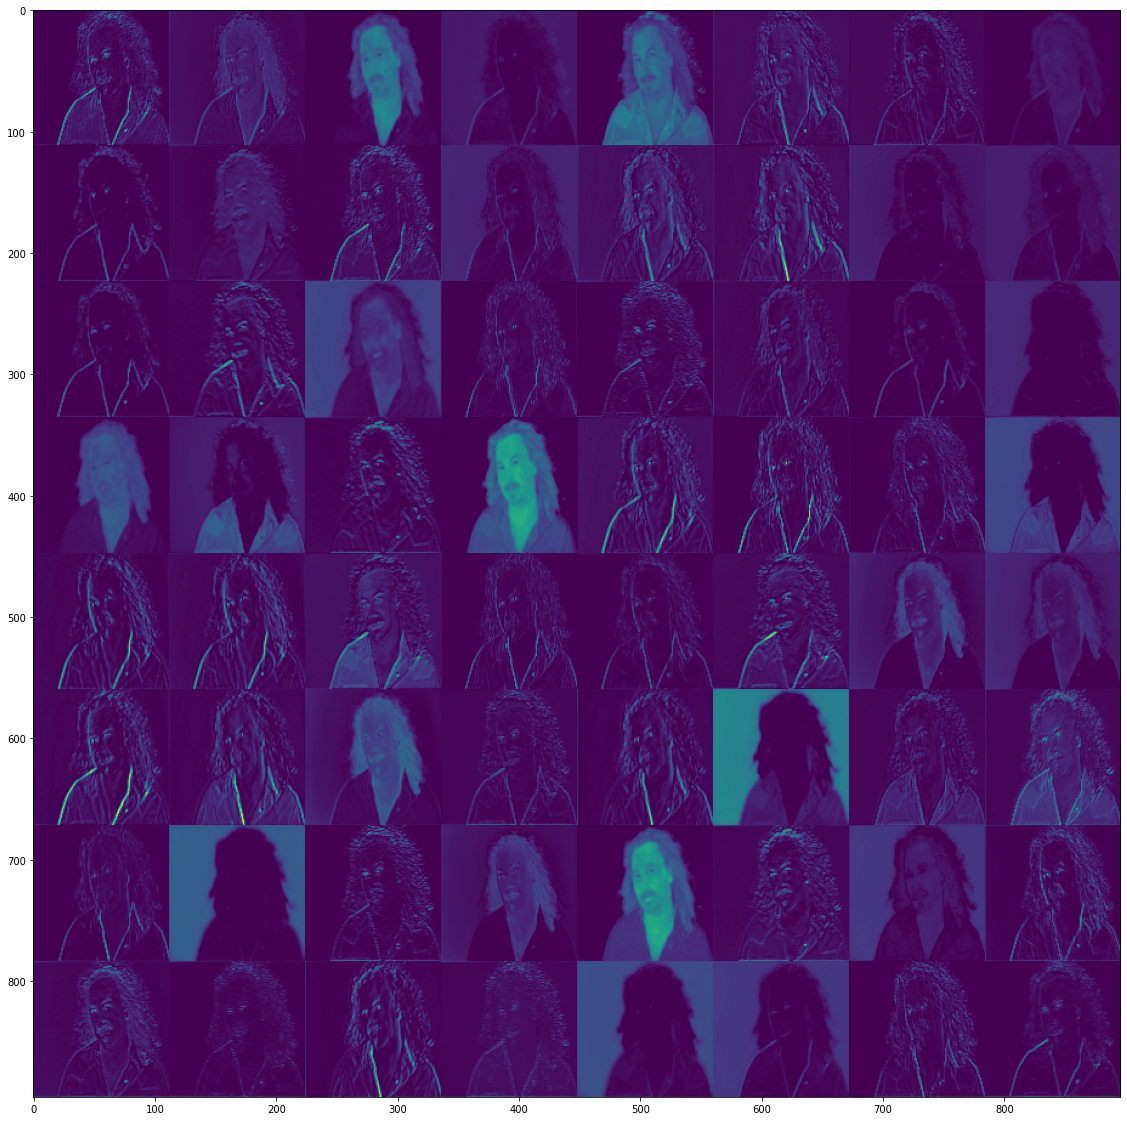

In [ ]:
cv2.normalize(img_l3,  img_l3, 0, 255, cv2.NORM_MINMAX)
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(1,1,1)
ax1.imshow(img_l3.astype('uint8'))

### Task 2b

Using [this module](https://www.google.ru/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwjDwsG9583sAhULx4sKHcMcCh4QFjAEegQIBhAC&url=https%3A%2F%2Fgithub.com%2Fraghakot%2Fkeras-vis&usg=AOvVaw3dxzpVlAlBY3nmBLIJVWAs) visualize the activation maximizing input images from the layer of your choice 

In [ ]:
from tf_keras_vis.activation_maximization import ActivationMaximization
from tf_keras_vis.utils.model_modifiers import ExtractIntermediateLayer, ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.activation_maximization.input_modifiers import Jitter, Rotate2D
from tf_keras_vis.activation_maximization.regularizers import TotalVariation2D, Norm
from tf_keras_vis.activation_maximization.callbacks import Progress


activation_maximization = ActivationMaximization(model,
                                                 model_modifier=[ExtractIntermediateLayer('block3_conv3'),
                                                                 ReplaceToLinear()],
                                                 clone=False)

In [ ]:
activations = activation_maximization(CategoricalScore(10),
                                      steps=200,
                                      input_modifiers=[Jitter(jitter=16), Rotate2D(degree=1)],
                                      regularizers=[TotalVariation2D(weight=1.0),
                                                    Norm(weight=0.3, p=1)],
                                      optimizer=tf.keras.optimizers.RMSprop(1.0, 0.999),
                                      callbacks=[Progress()])

200/200 [==============================] - 272s 1s/step - Score: 4242.6309 - TotalVariation2D: 39.6225 - Norm: 42.6852


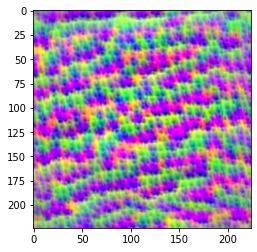

In [ ]:
plt.imshow(activations[0])

### Task 3

Classify [cats and dogs](https://www.kaggle.com/c/dogs-vs-cats/data) images with [features from CNN](https://keras.io/applications/#extract-features-with-vgg16) using SVM / KNN / etc...

In [ ]:
!pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-11-30 14:37:36          16732  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          10121  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4695  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3695  
promptcloud/care

In [ ]:
! kaggle competitions download -c 'dogs-vs-cats'
!unzip "train.zip" -d "cats_vs_dogs/"
!unzip "test1.zip" -d "cats_vs_dogs/"

In [ ]:
import os

data_path = 'cats_vs_dogs/train/'
files_list = os.listdir(data_path)

In [ ]:
X, y = [], []
i = 0

for file_name in files_list:
  image = cv2.imread(data_path + file_name)
  image = cv2.resize(image, (224, 224))
  image = np.expand_dims(image, axis=0)
  label = 0
  if 'dog' in file_name:
    label = 1
  
  features = model.predict(image)
  X.append(features.flatten())
  y.append(label)
  i += 1
  if i == 1000:
    break

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

knn = KNN(n_neighbors=5).fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
print('Precision score', precision_score(y_test, y_pred))
print('Recall score', recall_score(y_test, y_pred))
print('f1 score', f1_score(y_test, y_pred))

Precision score 0.9555555555555556
Recall score 0.8269230769230769
f1 score 0.88659793814433


### Building your own model

Consider the NON-working example below (x_train not defined)

In [ ]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

model = Sequential() # initialize linear stacked model
# create first conv layer and provide input shapes (other shapes will be calculated automatically)
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:])) 
# set activation function for the layer
model.add(Activation('relu'))
#repeat
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
# first maxpooling layer with 2x2 window
model.add(MaxPooling2D(pool_size=(2, 2)))
# set dropout to 25% of neurons number
model.add(Dropout(0.25))

# flatten convert ndarray fron the prev layer to 1D vector
model.add(Flatten())
# fully connected layer with 512 neurons
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

### Task 4

Create your own simple architecture and train CNN on [MNIST](https://keras.io/datasets/#mnist-database-of-handwritten-digits) dataset. Note that MNIST is 1 color channel dataset.
Test it on some hard images from the web, [such as](https://www.wpclipart.com/education/animal_numbers/animal_number_2.png).

In [ ]:
import keras
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.reshape(x_test.shape + (1,))

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Activation


simple_model = Sequential() # initialize linear stacked model
# create first conv layer and provide input shapes (other shapes will be calculated automatically)
simple_model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:])) 
# set activation function for the layer
simple_model.add(Activation('relu'))
#repeat
simple_model.add(Conv2D(32, (3, 3)))
simple_model.add(Activation('relu'))
# first maxpooling layer with 2x2 window
simple_model.add(MaxPooling2D(pool_size=(2, 2)))
# set dropout to 25% of neurons number
simple_model.add(Dropout(0.25))

# flatten convert ndarray fron the prev layer to 1D vector
simple_model.add(Flatten())
# fully connected layer with 512 neurons
simple_model.add(Dense(512))
simple_model.add(Activation('relu'))
simple_model.add(Dropout(0.5))
simple_model.add(Dense(10))
simple_model.add(Activation('softmax'))

simple_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

simple_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2)

Epoch 1/2
1875/1875 [==============================] - 170s 90ms/step - loss: 0.4675 - accuracy: 0.9301 - val_loss: 0.0672 - val_accuracy: 0.9762
Epoch 2/2
1875/1875 [==============================] - 168s 90ms/step - loss: 0.1180 - accuracy: 0.9653 - val_loss: 0.0603 - val_accuracy: 0.9807


0


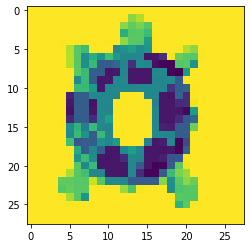

3


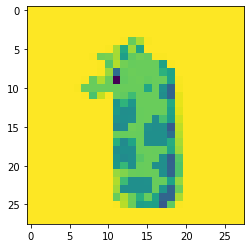

1


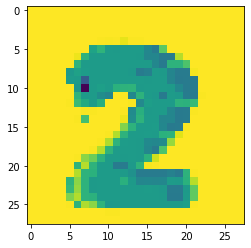

1


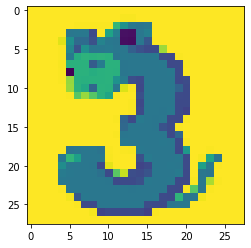

2


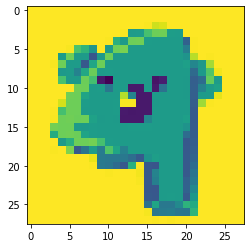

1


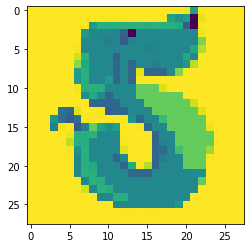

4


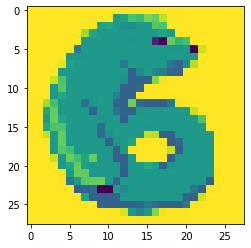

5


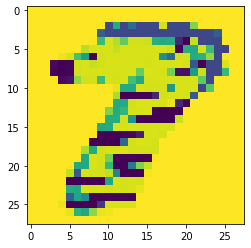

2


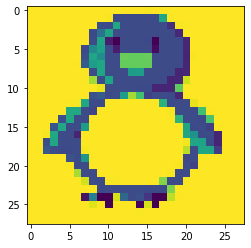

0


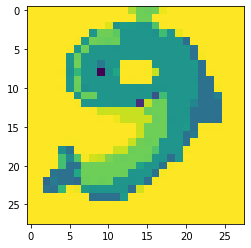

In [ ]:
import cv2
import matplotlib.pyplot as plt

for num in range(10):
  image = cv2.imread(f'{num}.jpg', 0)
  image = cv2.resize(image, (28, 28))
  image = np.expand_dims(image, axis=0)
  label = np.argmax(simple_model.predict(image))
  print(label)
  plt.imshow(image.reshape((28, 28)))
  plt.show()

### Task 5

Augment MNIST data using [ImageDataGenerator](https://keras.io/preprocessing/image/) and color inversion + visualize (or save) augmented images.
Train your model on augmented data and compare the results on your images from the web.

In [ ]:
import keras
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.reshape(x_test.shape + (1,))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    horizontal_flip=True,
    zoom_range=0.2,
    validation_split=0.2)
# добавить инверсию цветов 50 на 50
# в валидации только обычные
# убрать горизонтал флип
# посмотреть еще параметры

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Activation


simple_model = Sequential() # initialize linear stacked model
# create first conv layer and provide input shapes (other shapes will be calculated automatically)
simple_model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:])) 
# set activation function for the layer
simple_model.add(Activation('relu'))
#repeat
simple_model.add(Conv2D(32, (3, 3)))
simple_model.add(Activation('relu'))
# first maxpooling layer with 2x2 window
simple_model.add(MaxPooling2D(pool_size=(2, 2)))
# set dropout to 25% of neurons number
simple_model.add(Dropout(0.25))

# flatten convert ndarray fron the prev layer to 1D vector
simple_model.add(Flatten())
# fully connected layer with 512 neurons
simple_model.add(Dense(512))
simple_model.add(Activation('relu'))
simple_model.add(Dropout(0.5))
simple_model.add(Dense(10))
simple_model.add(Activation('softmax'))

simple_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
datagen.fit(x_train)

simple_model.fit(datagen.flow(x_train, y_train, batch_size=32,
                  subset='training'),
                  validation_data=datagen.flow(x_train, y_train,
                  batch_size=8, subset='validation'),
                  steps_per_epoch=1500, epochs=3)

Epoch 1/3
1500/1500 [==============================] - 152s 101ms/step - loss: 0.6376 - accuracy: 0.8599 - val_loss: 0.1623 - val_accuracy: 0.9483
Epoch 2/3
1500/1500 [==============================] - 151s 101ms/step - loss: 0.2257 - accuracy: 0.9308 - val_loss: 0.1415 - val_accuracy: 0.9566
Epoch 3/3
1500/1500 [==============================] - 151s 101ms/step - loss: 0.1909 - accuracy: 0.9432 - val_loss: 0.1061 - val_accuracy: 0.9686


8


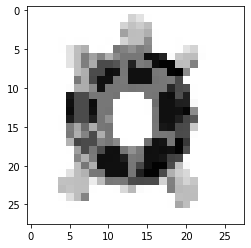

8


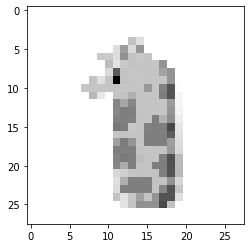

0


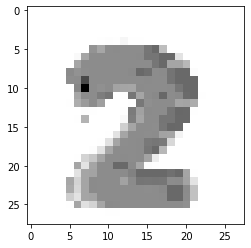

2


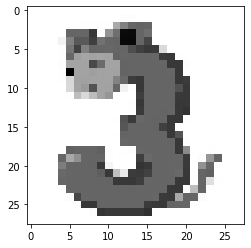

0


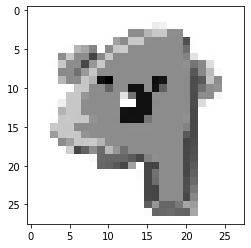

6


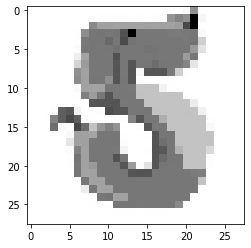

8


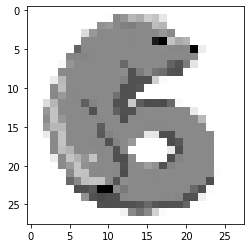

8


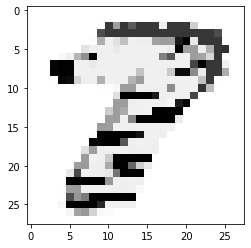

2


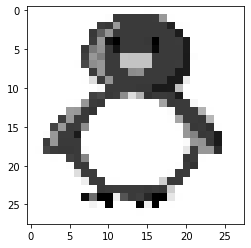

8


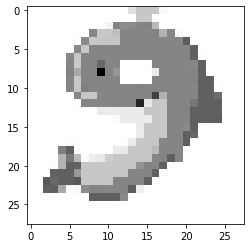

In [ ]:
import cv2
import matplotlib.pyplot as plt

for num in range(10):
  image = cv2.imread(f'{num}.jpg', 0)
  image = cv2.resize(image, (28, 28))
  image = np.expand_dims(image, axis=0)
  label = np.argmax(simple_model.predict(image))
  print(label)
  plt.imshow(image.reshape((28, 28)), cmap='gray')
  plt.show()

### Task 6

Try any of the data augmentation frameworks and show the results

### Task 7

[Use](https://www.learnopencv.com/keras-tutorial-fine-tuning-using-pre-trained-models/) pretrained model to train on CIFAR-10 dataset. For that, you can try to use your CNN architecture. 

### Task 8

[Implement](https://medium.com/mlreview/making-ai-art-with-style-transfer-using-keras-8bb5fa44b216) the style transfer technique